In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set(color_codes=True)
import random
%matplotlib inline
from scipy import stats
#sns.set(color_codes=True)

df= pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Wrangling the dataset to deal with NULL values properly
df['has_urgency_banner']= pd.to_numeric(df.replace({'has_urgency_banner':{np.nan:0}})['has_urgency_banner'])

#Replacing NULL Values of Rating Count with Zero
df["rating_five_count"]= pd.to_numeric(df.replace({"rating_five_count":{np.nan:0}})["rating_five_count"])
df["rating_four_count"]= pd.to_numeric(df.replace({"rating_four_count":{np.nan:0}})["rating_four_count"])
df["rating_three_count"]= pd.to_numeric(df.replace({"rating_three_count":{np.nan:0}})["rating_three_count"])
df["rating_two_count"]= pd.to_numeric(df.replace({"rating_two_count":{np.nan:0}})["rating_two_count"])
df["rating_one_count"]= pd.to_numeric(df.replace({"rating_one_count":{np.nan:0}})["rating_one_count"])
df["rating_count"]= df["rating_count"].astype(float) #Convert to float

In [3]:
#Wrangling the product_variation_size column to display Uniform Size Labels
df.iloc[765]["product_variation_size_id"]= "XL"
df.iloc[877]["product_variation_size_id"]= "S"
df.iloc[708:711]["product_variation_size_id"]= "S"

df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("SIZE", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Suit", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("-", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.strip()

df["product_variation_size_id"]= df.replace({"product_variation_size_id":{"One"\
                                :1,"2XL":"XXL","XXXL":"3XL","XXXXL":"4XL","XXXXXL":"5XL"}})["product_variation_size_id"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [4]:
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54.0,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135.0,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14.0,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579.0,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,0.0,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20.0,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367.0,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,0.0,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color

In [5]:
len(df[df['origin_country']=='US'])

31

In [6]:
#To sort products for men vs women products

men_keywords=['mans', 'mens','man','men','men\'s','man\'s']
women_keywords=['womans', 'womens','woman','women','women\'s','woman\'s','bikini']
men_row=[]
women_row=[]

i=0

#-6 because .find() returns -1 if it doesn't find any matching substring in given string
#So if it doesnt match any keyword, it'll output a list with 6 -1's
for title in df['title_orig']:
    if np.sum(np.array([title.lower().find(key) for key in women_keywords]))>-7:
         women_row.append(i)
    elif np.sum(np.array([title.lower().find(key) for key in men_keywords]))>-6:
         men_row.append(i)
    i+=1

In [7]:
#Price for males and females follow normal distribution! So can use Welch Test on them
#Mean Price Male = Mean Price Female
len(men_row), len(women_row)

(88, 1362)

#**Q2) )QQ Plots for TOTAL REVENUE of origin countries selling more High enough products**

In [8]:
df['revenue']=df['retail_price']*df['units_sold']
df1= df.sort_values('price').reset_index()
lowpr=np.array(df1.loc[:299]['rating'])
highpr=np.array(df1.loc[1273:1573][::-1]['rating'])

In [9]:
len(df[df['origin_country']=='US']) #Hence I'll only be making comparisons with 
#Data of USA and China
country_list=['US','CN']

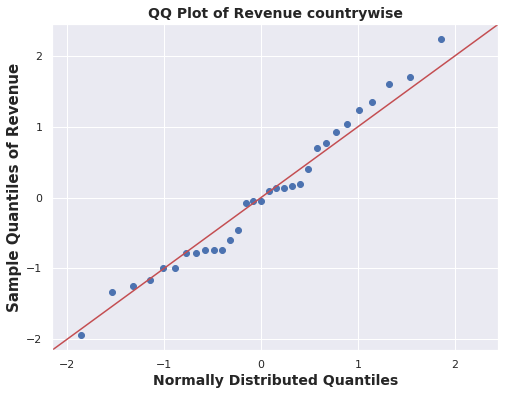

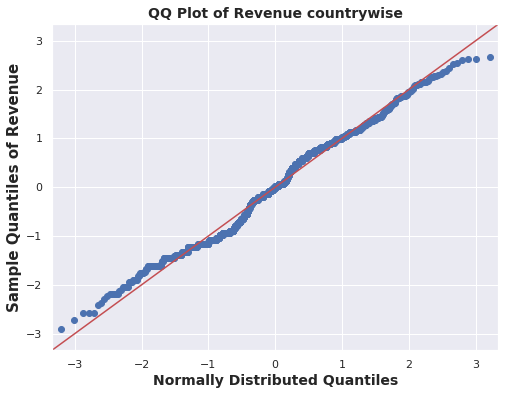

In [10]:
 #QQ Plots to check if Revenue from each product is Gaussian distributed or not
 #For USA and China
 for country in country_list:
    fig,ax= plt.subplots(figsize=(8,6))
    sm.qqplot(np.log(df[df['origin_country']==country]['revenue']), fit=True, line='45',ax=ax)
    
    plt.title("QQ Plot of Revenue countrywise", fontweight='bold',size=14)
    plt.xlabel("Normally Distributed Quantiles", fontweight='bold',size=14)
    plt.ylabel("Sample Quantiles of Revenue", fontweight='bold', size=15)
    plt.show()

#**Q2) a) Mean & Variance of Prices for products for males and females**

In [11]:
print("Mean Prices of:")
print("Products for males : %f"%np.array(df.loc[men_row]['price']).mean())
print("Products for females : %f"%np.array(df.loc[women_row]['price']).mean())

print("\nVariance of Prices of:")
print("Products for males : %f"%np.array(df.loc[men_row]['price']).var())
print("Products for females : %f"%np.array(df.loc[women_row]['price']).var())

var_fm=[np.array(df.loc[men_row]['price']).var(),np.array(df.loc[women_row]['price']).var()]

Mean Prices of:
Products for males : 10.610341
Products for females : 8.149060

Variance of Prices of:
Products for males : 23.092612
Products for females : 14.047709


#**Q2)b) QQ Plots for Products for Males and Females**

In [12]:
#Randomly subsetting Female product prices for the Wilcoxon and Paired Tests
#And Also Log Likelihood
np.random.seed(1)
a=np.random.permutation(len(women_row))
subset=a[:88]

In [13]:
mean=[np.array(df.loc[men_row]['price']).mean(),np.array(df.loc[women_row]['price'])[subset].mean()]
var=[np.array(df.loc[men_row]['price']).var(),np.array(df.loc[women_row]['price'])[subset].var()]
pricem=np.array(df.loc[men_row]['price'])
pricew=np.array(df.loc[women_row]['price'])

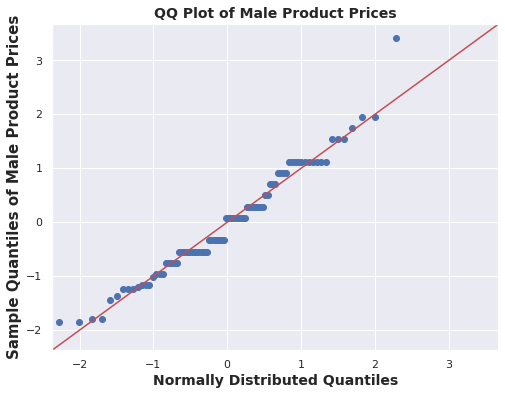

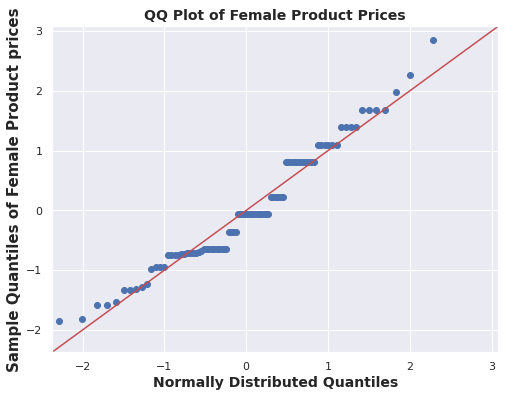

In [14]:
fig,ax= plt.subplots(figsize=(8,6))

sm.qqplot(df.loc[men_row]['price'], line='45', fit=True,ax=ax)
plt.title("QQ Plot of Male Product Prices", fontweight='bold',size=14)
plt.xlabel("Normally Distributed Quantiles", fontweight='bold',size=14)
plt.ylabel("Sample Quantiles of Male Product Prices", fontweight='bold', size=15)
plt.show()


fig,ax= plt.subplots(figsize=(8,6))

sm.qqplot(np.array(df.loc[women_row]['price'])[subset], line='45', fit=True,ax=ax)
plt.title("QQ Plot of Female Product Prices", fontweight='bold',size=14)
plt.xlabel("Normally Distributed Quantiles", fontweight='bold',size=14)
plt.ylabel("Sample Quantiles of Female Product prices", fontweight='bold', size=15)
plt.show()


#**Q2)c) Log Likelihood Estimates**

In [15]:
print("LOG LIKELIHOOD :")
logMLEm= 0.5*np.sum(-(pricem-mean[0])**2)/var[0]\
            -len(men_row)*np.log(np.sqrt(2*np.pi*var[0]))
logMLEw= 0.5*np.sum(-(pricew[subset]-mean[1])**2)/var[1]\
            -len(men_row)*np.log(np.sqrt(2*np.pi*var[1]))

print("Products for men = %.3f"%logMLEm)
print("Products for women = %.3f"%logMLEw)

LOG LIKELIHOOD :
Products for men = -263.005
Products for women = -233.380


Although the Log Likelihood for female products is higher than that of Male products i.e Female product prices are more normal than male product prices, the difference may only be slight because there's no major difference seen in the QQ plots. 

In [16]:
len(men_row), len(women_row)

(88, 1362)

#**Q2)d)95% CI of Means**

In [17]:
from scipy.stats import norm
alpha= 0.05
std= np.sqrt(var[0]) #Sample Unbiased Standard Deviation

n=len(pricem) #Number of Samples
z= norm.ppf(1-alpha/2)
epsilon= z*std/np.sqrt(n)
lowlim= mean[0]-epsilon
uplim= mean[0]+epsilon

print("Mean Price, Products for males : (%.3f, %.3f)"%(lowlim, uplim))

std= np.sqrt(var[1]) #Sample Unbiased Standard Deviation

n=len(pricew) #Number of Samples
z= norm.ppf(1-alpha/2)
epsilon= z*std/np.sqrt(n)
lowlim= mean[1]-epsilon
uplim= mean[1]+epsilon

print("Mean Price, Products for females : (%.3f, %.3f)"%(lowlim, uplim))


Mean Price, Products for males : (9.606, 11.614)
Mean Price, Products for females : (8.048, 8.412)


#**Q2)e)i) Welch Test to For Mean Prices for products Males and Females**

####Null Hypothesis ($H_0$): Mean prices of goods for men and women are the same
####Alternate Hypothesis ($H_1$): Mean prices of goods for men and women are different
####Confidence Level= $95\%$

In [18]:
alpha=0.05
t, pval= stats.ttest_ind(np.array(df.loc[men_row]['price']), np.array(df.loc[women_row]['price']), equal_var= False)

if alpha >= pval:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the Mean Prices of Male & Female Goods "\
          +"truly differ from each other")
else:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the Mean Prices of Male & Female Goods "\
         +"are essentially the same")

t-value = 4.687058
Significance Level = 5%
P-value = 0.000009
Null Hypothesis rejected. So, the Mean Prices of Male & Female Goods truly differ from each other


###From this point on, I've subsetted randomly, the female products group because the dimensions of samples of both cases must be the same for theses tests

#**Q2)e)ii) Wilcoxon Signed Rank Test for prices of male and female groups**

####Null Hypothesis ($H_0$): Mean prices of goods for men and women are the same
####Alternate Hypothesis ($H_1$): Mean prices of goods for men and women are different


####Confidence Level= $95\%$

In [19]:
alpha=0.05

_, pval = stats.wilcoxon(np.array(df.loc[men_row]['price'])-np.array(df.loc[women_row]['price'])[subset])

if alpha >= pval:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Rejected Null Hypothesis. So, the mean prices of products"\
          +" meant for males and females are different")
else:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean rating of products"\
          +" with Higher and Lower Revenue are equal")

Significance Level = 5%
P-value = 0.000165
Rejected Null Hypothesis. So, the mean prices of products meant for males and females are different


#**Q2)f) Paired t Test for prices of male and female groups**

####Null Hypothesis ($H_0$): Mean difference between prices of goods for men and women $=0$
####Alternate Hypothesis ($H_1$): Mean difference between prices of goods for men and women $\neq0$


####Confidence Level= $95\%$

In [20]:
t, pval= stats.ttest_1samp(np.array(df.loc[men_row]['price'])-np.array(df.loc[women_row]['price'])[subset], 0)

if alpha >= pval:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the Mean Prices of Male & Female Goods "\
          +"truly differ from each other")
else:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the Mean Prices of Male & Female Goods "\
         +"are essentially the same")

t-value = 3.990689
Significance Level = 5%
P-value = 0.000137
Null Hypothesis rejected. So, the Mean Prices of Male & Female Goods truly differ from each other


#**Q2) ) Wilcoxon Test**

Null Hypothesis $(H_0) :$ Higher and Lower Revenue Products have equal mean ratings

Alternate Hypothesis $(H_1):$ Higher and Lower Revenue Products with have unequal mean ratings

In [21]:
alpha=0.05

_, pval = stats.wilcoxon(highpr-lowpr)

if alpha >= pval:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Rejected Null Hypothesis. So, the mean rating of products"\
          +" with Higher and Lower Prices are different")
else:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean rating of products"\
          +" with Higher and Lower Revenue are equal")

Significance Level = 5%
P-value = 0.094550
Failed to reject Null Hypothesis. So, the mean rating of products with Higher and Lower Revenue are equal


In [22]:
t, pval= stats.ttest_1samp(highpr-lowpr, 0)

if alpha >= pval:
    print("t-value = %f"%t)
    print("Significance Level = %d"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = 1.581417
Significance Level = 5%
P-value = 0.114840
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


In [23]:
df['uses_ad_boosts'].value_counts()

0    892
1    681
Name: uses_ad_boosts, dtype: int64

In [ ]:
a= np.array(df.loc[df['uses_ad_boosts']==0].index[::-1])
rows=a[:681]
rows


In [25]:
np.random.seed(2)
a= np.array(df.loc[df['uses_ad_boosts']==0].index)
a1=np.random.permutation(a)
rows=a1[:681]

#Wilcoxon Signed Rank Test Begins
r1=np.array(df[df['uses_ad_boosts']==1]['rating'])
r2=np.array(df[df['uses_ad_boosts']==0]['rating'].loc[rows])
alpha=0.05

_, pval = stats.wilcoxon(r2-r1)

if alpha >= pval:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Rejected Null Hypothesis. So, the mean ratings of products"\
          +" with and without ad boosts are different")
else:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean ratings of products"\
          +" with and without ad boosts are equal")

Significance Level = 5%
P-value = 0.230042
Failed to reject Null Hypothesis. So, the mean ratings of products with and without ad boosts are equal


#**Q2)g)Correlation and Significance**
Correlation and its significance of Rating with fraction of five star, four star, 3 star, 2 star and 1 star counts.

In [26]:
r5,p5= stats.pearsonr(df[df['rating_count']!=0]['rating'],(df['rating_five_count']/df['rating_count']).dropna())
r4,p4= stats.pearsonr(df[df['rating_count']!=0]['rating'],(df['rating_four_count']/df['rating_count']).dropna())
r3,p3= stats.pearsonr(df[df['rating_count']!=0]['rating'],(df['rating_three_count']/df['rating_count']).dropna())
r2,p2= stats.pearsonr(df[df['rating_count']!=0]['rating'],(df['rating_two_count']/df['rating_count']).dropna())
r1,p1= stats.pearsonr(df[df['rating_count']!=0]['rating'],(df['rating_one_count']/df['rating_count']).dropna())

r=[r1,r2,r3,r4,r5]
pval=[p1,p2,p3,p4,p5]

print('Correlation of Rating of Products with- \n')
for i in range(5):
    print(f"Fraction of {i+1} Stars:")
    print("Correlation = %f"%r[i])
    print("Significance = %f \n"%pval[i])

Correlation of Rating of Products with- 

Fraction of 1 Stars:
Correlation = -0.826313
Significance = 0.000000 

Fraction of 2 Stars:
Correlation = -0.474256
Significance = 0.000000 

Fraction of 3 Stars:
Correlation = -0.303143
Significance = 0.000000 

Fraction of 4 Stars:
Correlation = 0.075171
Significance = 0.003280 

Fraction of 5 Stars:
Correlation = 0.899677
Significance = 0.000000 



#**Q2)h) $\chi^2$ Contingency test to Determine Independence of Two Categorical Variables**

####Null Hypothesis $(H_0)$: The products which use ad boosts sell equal units as those which don't.
####Alternate Hypothesis $(H_1)$: The products which use ad boosts sell different units as those which don't. That is the units sold categorical variable is dependent upon the categorical variable of using ad boosts

Confidence Level= $95 \%$

In [27]:
t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['uses_ad_boosts'],df['units_sold'])) 
  
# interpret p-value 
alpha = 0.05
print("p value is %.6f"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So units sold depends upon if the product has ad boost or not') 
else: 
    print('Null Hypothesis is not rejected. So units sold does not depend upon if the product has ad boost or not')

p value is 0.003662
Null Hypothesis is rejected. So units sold depends upon if the product has ad boost or not
